# Install Libraries

In [2]:
%pip install --upgrade pip
%pip install -U matplotlib
%pip install -U seaborn
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/11.1 MB 1.3 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.1 MB 1.3 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.1 MB 1.3 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.1 MB 1.3 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.1 MB 838.9 kB/s eta 0:00:12
   ---- ----------------------------------- 1.3/11.1 MB 838

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Preprocessing

In [4]:
data_3 = pd.read_csv('../Material/Mall_Customers.csv')
data_3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data_3.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


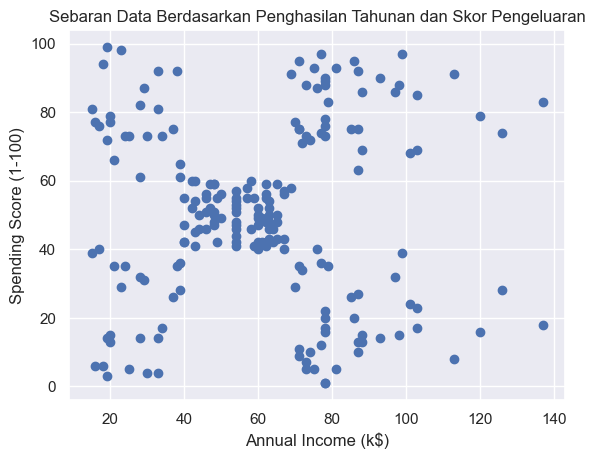

In [6]:
plt.scatter(data_3['Annual Income (k$)'], data_3['Spending Score (1-100)'])
plt.title('Sebaran Data Berdasarkan Penghasilan Tahunan dan Skor Pengeluaran')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [7]:
a = data_3.iloc[:, lambda data: [3, 4]]
a

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# K-Means Clustering Model Building

In [10]:
kmeans = KMeans(5, n_init = 'auto')

In [11]:
kmeans.fit(a)

KMeans(n_clusters=5)

In [12]:
identified_clusters = kmeans.fit_predict(a)
identified_clusters

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [13]:
data_with_clusters = data_3.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,2
197,198,Male,32,126,74,4
198,199,Male,32,137,18,2


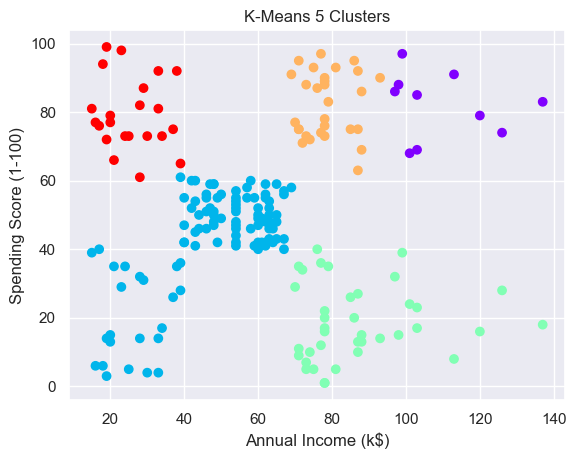

In [26]:
plt.scatter(data_with_clusters['Annual Income (k$)']
            , data_with_clusters['Spending Score (1-100)']
            , c = data_with_clusters['Cluster']
            , cmap = 'rainbow')
plt.title('K-Means 5 Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Model Evaluation

In [28]:
silhouette_score(a, identified_clusters)

0.4650980534574266

# WCSS for Elbow Methode

In [14]:
kmeans.inertia_

44454.47647967974

In [15]:
wcss = []
for i in range (1,20):
    kmeans = KMeans(i)
    kmeans.fit(a)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [43]:
wcss

[269981.28,
 183257.86154461786,
 132162.13629759205,
 73880.64496247195,
 44448.4554479337,
 38797.9027638142,
 30566.45113025185,
 28474.084326219163,
 23254.75234644582,
 21146.212892685347,
 20927.400163556886,
 16800.41872588196,
 15098.099323080023,
 13246.010764835133,
 12071.421934159027,
 10927.826941576943,
 11161.72656010656,
 9872.482728937728,
 9027.661660561662]

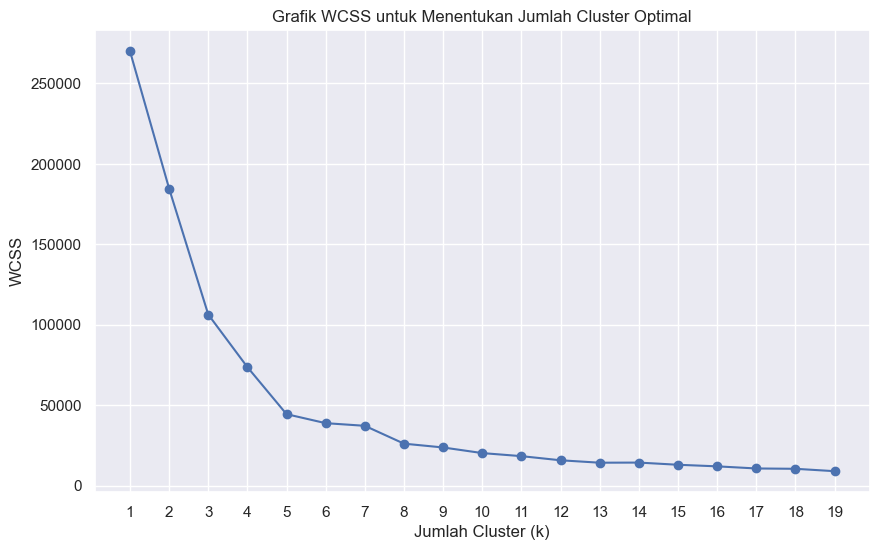

In [53]:
# Jumlah cluster yang sesuai
k_values = range(1, len(wcss) + 1)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Grafik WCSS untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)  # Menampilkan semua nilai k pada sumbu x
plt.grid(True)
plt.show()